# Regression #

In [19]:
import numpy as np
import pandas as pd

In [20]:
X_final = pd.read_csv('/Users/zumiis/bootcamp_git/midterm/vscode_files/X_for_testing.csv')
y_final = pd.read_csv('/Users/zumiis/bootcamp_git/midterm/vscode_files/y_regression_final.csv')

X_sample = pd.read_csv('/Users/zumiis/bootcamp_git/midterm/vscode_files/X_for_sample_testing.csv')
y_sample = pd.read_csv('/Users/zumiis/bootcamp_git/midterm/vscode_files/y_regression_sample.csv')

In [21]:
X_final2 = pd.read_csv('/Users/zumiis/bootcamp_git/midterm/vscode_files/testing_X_jan.csv')
y_final2 = pd.read_csv('/Users/zumiis/bootcamp_git/midterm/vscode_files/testing_y_jan.csv')

X_final2['fl_date'] = pd.to_datetime(X_final2['fl_date'])

In [22]:
X_final2

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,is_delayed,avg_delay_distance,dep_time_traffic,arr_time_traffic,weather_og_quarter,weather_dest_quarter,weather_og_period,weather_dest_period,weather_og_delay,weather_dest_delay
0,2020-01-01,WN,WN,WN,611,WN,N210WN,611,14107,PHX,...,0,5.954882,146459.0,106999.0,2.896568,1.809727,2.998350,2.235927,5.739033,5.271765
1,2020-01-01,WN,WN,WN,611,WN,N210WN,611,14107,PHX,...,0,5.954882,146459.0,106999.0,2.896568,1.809727,2.998350,2.235927,5.739033,5.271765
2,2020-01-01,WN,WN,WN,950,WN,N7742B,950,14107,PHX,...,0,5.954882,146459.0,106999.0,2.896568,1.809727,2.998350,2.235927,5.739033,5.271765
3,2020-01-01,WN,WN,WN,950,WN,N7742B,950,14107,PHX,...,0,5.954882,146459.0,106999.0,2.896568,1.809727,2.998350,2.235927,5.739033,5.271765
4,2020-01-01,WN,WN,WN,2742,WN,N247WN,2742,14107,PHX,...,0,5.954882,146459.0,106999.0,2.896568,1.809727,2.998350,2.235927,5.739033,5.271765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13861,2020-01-02,F9,F9,F9,158,F9,N943FR,158,11292,DEN,...,0,5.313112,136296.0,136037.0,2.273774,2.000000,2.263550,2.090047,5.774543,5.271765
13862,2020-01-05,F9,F9,F9,158,F9,N949FR,158,11292,DEN,...,0,5.313112,136296.0,136037.0,2.273774,2.000000,2.263550,2.090047,5.774543,5.271765
13863,2020-01-07,F9,F9,F9,158,F9,N949FR,158,11292,DEN,...,0,5.313112,136296.0,136037.0,2.273774,2.000000,2.263550,2.090047,5.774543,5.271765
13864,2020-01-04,WN,WN,WN,3013,WN,N268WN,3013,13204,MCO,...,1,5.313112,146459.0,136037.0,2.003754,2.766284,2.482585,2.455529,5.561964,5.271765


In [ ]:
##separate the columns needed for submission

In [23]:
reg_submission = ['fl_date', 'mkt_carrier', 'mkt_carrier_fl_num', 'origin', 'dest']

In [24]:
reg_submission_append = X_final2[reg_submission]

In [25]:
reg_submission_append

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin,dest
0,2020-01-01,WN,611,PHX,DEN
1,2020-01-01,WN,611,PHX,DEN
2,2020-01-01,WN,950,PHX,DEN
3,2020-01-01,WN,950,PHX,DEN
4,2020-01-01,WN,2742,PHX,DEN
...,...,...,...,...,...
13861,2020-01-02,F9,158,DEN,MSN
13862,2020-01-05,F9,158,DEN,MSN
13863,2020-01-07,F9,158,DEN,MSN
13864,2020-01-04,WN,3013,MCO,CLE


In [26]:
reg_submission_append.to_csv('/Users/zumiis/bootcamp_git/midterm/vscode_files/append_to_submission.csv', index=False)

## PCA on the 2020 data ##

In [27]:
reg_features = ['fl_date', 'mkt_unique_carrier', 'origin_city_name', 'dest_city_name', 'crs_dep_time']
reg_test_sample= X_final2[reg_features]

In [28]:
reg_test_sample = pd.concat([reg_test_sample, X_final2[['arr_delay7', 'arr_delay14', 'arr_rolling7', 'arr_rolling14',
       'dep_delay7', 'dep_delay14', 'dep_rolling7', 'dep_rolling14', 'quarter',
       'year', 'month', 'day', 'avg_delay_carrier', 'avg_delay_origin_quart',
       'avg_delay_dest_quart', 'hour_only_dep', 'hour_only_arr',
       'time_period_dep', 'time_period_arr', 'traffic_origin_port',
       'traffic_dest_port', 'distance_encoded', 
       'avg_delay_distance', 'dep_time_traffic', 'arr_time_traffic',
       'weather_og_quarter', 'weather_dest_quarter', 'weather_og_period',
       'weather_dest_period', 'weather_og_delay', 'weather_dest_delay']]], axis=1)

In [29]:
dummies = pd.get_dummies(reg_test_sample[['mkt_unique_carrier','origin_city_name','dest_city_name']])

In [30]:
reg_test_sample = pd.concat([reg_test_sample,dummies],axis = 1 )
reg_test_sample = reg_test_sample.drop(['mkt_unique_carrier','origin_city_name','dest_city_name','fl_date', 'crs_dep_time'],axis=1)

In [31]:
reg_test_sample = reg_test_sample.reset_index().drop(columns='index')

In [32]:
reg_test_sample

,arr_delay7,arr_delay14,arr_rolling7,arr_rolling14,dep_delay7,dep_delay14,dep_rolling7,dep_rolling14,quarter,year,...,"dest_city_name_Savannah, GA","dest_city_name_Seattle, WA","dest_city_name_St. Louis, MO","dest_city_name_Syracuse, NY","dest_city_name_Tallahassee, FL","dest_city_name_Tucson, AZ","dest_city_name_Washington, DC","dest_city_name_West Palm Beach/Palm Beach, FL","dest_city_name_White Plains, NY","dest_city_name_Wilmington, NC"
0,1.0,-9.0,1.285714,1.571429,-1.0,-8.0,6.000000,4.714286,1,2019,...,0,0,0,0,0,0,0,0,0,0
1,-19.0,13.0,13.428571,11.000000,-5.0,6.0,9.857143,9.500000,1,2019,...,0,0,0,0,0,0,0,0,0,0
2,1.0,-9.0,1.285714,1.571429,-1.0,-8.0,6.000000,4.714286,1,2019,...,0,0,0,0,0,0,0,0,0,0
3,-19.0,13.0,13.428571,11.000000,-5.0,6.0,9.857143,9.500000,1,2019,...,0,0,0,0,0,0,0,0,0,0
4,1.0,-9.0,1.285714,1.571429,-1.0,-8.0,6.000000,4.714286,1,2019,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13861,-1.0,-13.0,4.428571,-2.500000,7.0,2.0,11.857143,7.214286,2,2019,...,0,0,0,0,0,0,0,0,0,0
13862,-1.0,-13.0,4.428571,-2.500000,7.0,2.0,11.857143,7.214286,2,2019,...,0,0,0,0,0,0,0,0,0,0
13863,-1.0,-13.0,4.428571,-2.500000,7.0,2.0,11.857143,7.214286,2,2019,...,0,0,0,0,0,0,0,0,0,0
13864,32.0,-15.0,0.428571,3.571429,11.0,-5.0,6.428571,10.571429,3,2018,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
NumPercent = scaler.fit_transform(reg_test_sample[['arr_delay7', 'arr_delay14', 'arr_rolling7',
       'arr_rolling14', 'dep_delay7', 'dep_delay14', 'dep_rolling7',
       'dep_rolling14', 'quarter', 'year', 'month', 'day', 'avg_delay_carrier',
       'avg_delay_origin_quart', 'avg_delay_dest_quart', 'hour_only_dep',
       'hour_only_arr', 'time_period_dep', 'time_period_arr',
       'traffic_origin_port', 'traffic_dest_port', 'distance_encoded',
       'avg_delay_distance', 'dep_time_traffic',
       'arr_time_traffic', 'weather_og_quarter', 'weather_dest_quarter',
       'weather_og_period', 'weather_dest_period', 'weather_og_delay',
       'weather_dest_delay']])

In [34]:
reg_test_scaled = pd.DataFrame(NumPercent,columns=['arr_delay7', 'arr_delay14', 'arr_rolling7',
       'arr_rolling14', 'dep_delay7', 'dep_delay14', 'dep_rolling7',
       'dep_rolling14', 'quarter', 'year', 'month', 'day', 'avg_delay_carrier',
       'avg_delay_origin_quart', 'avg_delay_dest_quart', 'hour_only_dep',
       'hour_only_arr', 'time_period_dep', 'time_period_arr',
       'traffic_origin_port', 'traffic_dest_port', 'distance_encoded',
       'avg_delay_distance', 'dep_time_traffic',
       'arr_time_traffic', 'weather_og_quarter', 'weather_dest_quarter',
       'weather_og_period', 'weather_dest_period', 'weather_og_delay',
       'weather_dest_delay'])
reg_test_scaled.head()

,arr_delay7,arr_delay14,arr_rolling7,arr_rolling14,dep_delay7,dep_delay14,dep_rolling7,dep_rolling14,quarter,year,...,distance_encoded,avg_delay_distance,dep_time_traffic,arr_time_traffic,weather_og_quarter,weather_dest_quarter,weather_og_period,weather_dest_period,weather_og_delay,weather_dest_delay
0,-0.091634,-0.337571,-0.245750,-0.322913,-0.207221,-0.484469,-0.269071,-0.473808,-1.275684,1.081958,...,-0.731695,0.731695,0.725609,-0.575195,0.383926,-1.287084,0.599303,-0.721869,0.052411,-1.068394
1,-0.402866,0.368295,0.198135,0.244715,-0.271512,0.004054,-0.124030,-0.172745,-1.275684,1.081958,...,-0.731695,0.731695,0.725609,-0.575195,0.383926,-1.287084,0.599303,-0.721869,0.052411,-1.068394
2,-0.091634,-0.337571,-0.245750,-0.322913,-0.207221,-0.484469,-0.269071,-0.473808,-1.275684,1.081958,...,-0.731695,0.731695,0.725609,-0.575195,0.383926,-1.287084,0.599303,-0.721869,0.052411,-1.068394
3,-0.402866,0.368295,0.198135,0.244715,-0.271512,0.004054,-0.124030,-0.172745,-1.275684,1.081958,...,-0.731695,0.731695,0.725609,-0.575195,0.383926,-1.287084,0.599303,-0.721869,0.052411,-1.068394
4,-0.091634,-0.337571,-0.245750,-0.322913,-0.207221,-0.484469,-0.269071,-0.473808,-1.275684,1.081958,...,-0.731695,0.731695,0.725609,-0.575195,0.383926,-1.287084,0.599303,-0.721869,0.052411,-1.068394


In [35]:
reg_test_sample2 = reg_test_sample.drop(columns=['arr_delay7', 'arr_delay14', 'arr_rolling7',
       'arr_rolling14', 'dep_delay7', 'dep_delay14', 'dep_rolling7',
       'dep_rolling14', 'quarter', 'year', 'month', 'day', 'avg_delay_carrier',
       'avg_delay_origin_quart', 'avg_delay_dest_quart', 'hour_only_dep',
       'hour_only_arr', 'time_period_dep', 'time_period_arr',
       'traffic_origin_port', 'traffic_dest_port', 'distance_encoded',
       'avg_delay_distance', 'dep_time_traffic',
       'arr_time_traffic', 'weather_og_quarter', 'weather_dest_quarter',
       'weather_og_period', 'weather_dest_period', 'weather_og_delay',
       'weather_dest_delay']).copy()

In [36]:
reg_test_scaled.reset_index(drop=True, inplace=True)
reg_test_sample.reset_index(drop=True, inplace=True)
reg_test_PCA = pd.concat([reg_test_sample2,reg_test_scaled],axis=1)

In [37]:
reg_test_PCA = reg_test_PCA.fillna(0)

In [38]:
pca = PCA(n_components=100)

In [39]:
components = pca.fit_transform(reg_test_PCA)

In [40]:
pca.explained_variance_

array([4.26611427e+00, 3.73628965e+00, 2.55313043e+00, 2.27331746e+00,
       2.16164302e+00, 2.09506725e+00, 1.91097248e+00, 1.79401516e+00,
       1.69464273e+00, 1.57444668e+00, 1.10989682e+00, 9.92029377e-01,
       9.51949564e-01, 9.12081673e-01, 8.66644875e-01, 7.16099365e-01,
       5.24476970e-01, 4.11625057e-01, 2.99019143e-01, 2.45505478e-01,
       2.25960953e-01, 1.45623413e-01, 1.30745342e-01, 1.26424951e-01,
       9.32776817e-02, 9.25147687e-02, 8.45339679e-02, 8.36951117e-02,
       7.77244418e-02, 7.39746154e-02, 6.61061678e-02, 6.03294052e-02,
       5.49712051e-02, 5.13288016e-02, 4.90671618e-02, 4.67656069e-02,
       4.42169393e-02, 4.38981774e-02, 4.23118171e-02, 4.00280273e-02,
       3.68444215e-02, 3.62373322e-02, 3.38996771e-02, 3.35309275e-02,
       2.98259514e-02, 2.83228747e-02, 2.80473160e-02, 2.70384482e-02,
       2.58317152e-02, 2.49878615e-02, 2.39570642e-02, 2.37719783e-02,
       2.26589242e-02, 2.12509316e-02, 2.05213267e-02, 1.98427140e-02,
      

In [41]:
import numpy as np
import matplotlib.pyplot as plt

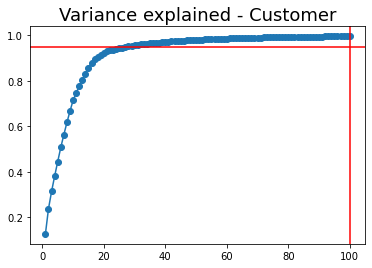

In [42]:
# Calculates the proportion of variance explained\n",
var_exp_cust = np.cumsum(pca.explained_variance_ratio_)

# Plots the elbow plot for the wine pca
plt.plot(range(1,101), var_exp_cust, marker='o')
plt.title("Variance explained - Customer", fontsize=18)
plt.axhline(0.95,c='r')
plt.axvline(100,c='r')
plt.show()

In [43]:
pca.components_

array([[ 0.04573234, -0.02359081,  0.00571393, ...,  0.09175239,
        -0.02308177, -0.00757561],
       [ 0.02232713, -0.00650751, -0.00531728, ...,  0.05753838,
         0.03419369,  0.01071834],
       [-0.02153195,  0.01585969, -0.04206488, ...,  0.05089678,
        -0.04690871, -0.03169514],
       ...,
       [ 0.00155136,  0.02361859,  0.00645168, ..., -0.03536223,
         0.00069763, -0.00064895],
       [-0.00359021, -0.05894541,  0.00135839, ..., -0.01444832,
         0.00059967, -0.00022603],
       [ 0.01651093, -0.02852826,  0.04734597, ...,  0.00569197,
         0.00470069, -0.00204606]])

In [44]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
0,0.045732,-0.023591,0.005714,-0.051445,0.000192,-0.000189,-0.001469,-0.000203,0.015328,0.009930,...,-0.071279,0.071279,-0.048530,0.172192,0.010556,0.083322,0.003122,0.091752,-0.023082,-0.007576
1,0.022327,-0.006508,-0.005317,-0.019389,0.000963,0.000185,-0.021662,-0.006023,0.026701,0.008721,...,0.090691,-0.090691,0.256609,-0.100417,0.145333,0.042946,0.171209,0.057538,0.034194,0.010718
2,-0.021532,0.015860,-0.042065,0.076090,-0.001335,0.000967,0.012721,0.003725,-0.067350,0.022919,...,-0.394159,0.394159,0.053420,-0.013479,-0.146356,0.027768,-0.149666,0.050897,-0.046909,-0.031695
3,0.023054,-0.009146,0.022631,0.049805,0.000095,0.000007,-0.001134,0.004390,-0.042548,-0.047154,...,0.180278,-0.180278,0.070740,0.131784,-0.191733,-0.422356,-0.215463,-0.430893,-0.135818,0.016503
4,-0.063321,0.042680,-0.035636,0.029125,-0.002396,0.000702,0.008334,0.005969,-0.033878,0.048421,...,0.107230,-0.107230,-0.099704,-0.003095,0.323961,0.259355,0.320663,0.250224,0.063821,-0.012881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.009046,-0.005603,-0.040165,-0.020310,0.168895,0.016643,-0.007093,-0.125530,0.029368,-0.007159,...,0.000291,-0.000291,-0.017611,0.001044,0.031805,0.007425,-0.036983,-0.021684,0.006375,0.000463
96,-0.039525,0.029841,-0.021109,0.014926,-0.070870,-0.006684,0.043399,0.047796,-0.016149,0.018373,...,0.006004,-0.006004,0.010544,-0.021074,-0.020656,0.006041,0.036670,-0.006735,0.015822,0.005290
97,0.001551,0.023619,0.006452,-0.003935,-0.073085,-0.038329,0.005884,0.061807,-0.013810,0.029847,...,0.000143,-0.000143,-0.002507,0.010461,-0.010700,0.002093,0.004251,-0.035362,0.000698,-0.000649
98,-0.003590,-0.058945,0.001358,-0.032942,0.184248,-0.012431,-0.004856,-0.083499,-0.006410,0.017067,...,-0.001986,0.001986,-0.008173,0.008629,-0.014638,-0.004390,0.002914,-0.014448,0.000600,-0.000226


In [45]:
PCAColNames = [f'PC{i}'for i in range(1,101)]

In [46]:
#PCADataFrame = pd.DataFrame(components,columns=PCAColNames)
X_final_jan = pd.DataFrame(components,columns=PCAColNames)

In [47]:
X_final_jan

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,-1.752335,1.999412,0.605334,-0.513637,-1.063588,-0.679383,0.147754,-0.492801,-0.430548,-1.486618,...,-0.027058,-0.015078,0.013513,-0.013845,0.010944,0.008079,-0.031181,-0.023686,0.017106,-0.013037
1,-1.334918,2.484019,0.497436,-0.091410,-0.570120,-0.856168,0.307136,-0.267535,-0.995325,-1.398537,...,-0.033636,-0.003347,0.018374,-0.008773,0.026794,0.008586,-0.020256,-0.023884,0.033933,-0.017588
2,-1.752335,1.999412,0.605334,-0.513637,-1.063588,-0.679383,0.147754,-0.492801,-0.430548,-1.486618,...,-0.027058,-0.015078,0.013513,-0.013845,0.010944,0.008079,-0.031181,-0.023686,0.017106,-0.013037
3,-1.334918,2.484019,0.497436,-0.091410,-0.570120,-0.856168,0.307136,-0.267535,-0.995325,-1.398537,...,-0.033636,-0.003347,0.018374,-0.008773,0.026794,0.008586,-0.020256,-0.023884,0.033933,-0.017588
4,-1.752335,1.999412,0.605334,-0.513637,-1.063588,-0.679383,0.147754,-0.492801,-0.430548,-1.486618,...,-0.027058,-0.015078,0.013513,-0.013845,0.010944,0.008079,-0.031181,-0.023686,0.017106,-0.013037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13861,-0.406360,-0.570340,-1.545404,1.438557,-1.034535,0.140405,-0.976198,0.331035,1.016052,-0.766111,...,-0.112293,-0.069922,0.060084,-0.104465,-0.035426,0.159867,-0.109782,-0.072647,0.180338,-0.019786
13862,-0.406360,-0.570340,-1.545404,1.438557,-1.034535,0.140405,-0.976198,0.331035,1.016052,-0.766111,...,-0.112293,-0.069922,0.060084,-0.104465,-0.035426,0.159867,-0.109782,-0.072647,0.180338,-0.019786
13863,-0.406360,-0.570340,-1.545404,1.438557,-1.034535,0.140405,-0.976198,0.331035,1.016052,-0.766111,...,-0.112293,-0.069922,0.060084,-0.104465,-0.035426,0.159867,-0.109782,-0.072647,0.180338,-0.019786
13864,-1.254183,-0.119261,0.575970,1.558417,0.246069,1.105079,-1.288278,0.221063,0.910547,0.983700,...,0.035989,-0.078794,0.099793,-0.063417,-0.129470,0.159403,-0.070959,0.063985,0.171471,0.008811


## Random Forest Regressor - test data ##

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,train_size=0.8)

In [49]:
#Create a Gaussian Classifier
rfg_model = RandomForestRegressor()

In [50]:
#Train the model using the training sets y_pred=clf.predict(X_test)
rfg_model.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
y_predRFG = rfg_model.predict(X_final_jan)

In [52]:
y_predRFG

array([ 5.21, 11.71,  5.21, ...,  0.  ,  9.71,  9.71])

In [53]:
y_randomforest = pd.DataFrame(y_predRFG)

In [91]:
y_randomforest = y_randomforest.rename(columns={0:'randomforest_prediction'})

In [93]:
y_randomforest.to_csv('/Users/zumiis/bootcamp_git/midterm/submission_files/y_random_forest.csv', index=False)

In [55]:
y_randomforest

,0
0,5.21
1,11.71
2,5.21
3,11.71
4,5.21
...,...
13861,0.00
13862,0.00
13863,0.00
13864,9.71


## Gradient Boosting - test data ##

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,train_size=0.8)

In [57]:
# define the model
gbr_model = GradientBoostingRegressor()

In [58]:
# fit the model on the whole dataset
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [59]:
y_predGB = gbr_model.predict(X_final_jan)

In [66]:
y_predGB

array([  1.06642124,   5.95290941,   1.06642124, ..., -13.25119292,
        -8.30426515,  -8.30426515])

In [67]:
y_gradientboost = pd.DataFrame(y_predGB)

In [95]:
y_gradientboost =  y_gradientboost.rename(columns={0:'gradientBoost_prediction'})

In [96]:
y_gradientboost.to_csv('/Users/zumiis/bootcamp_git/midterm/submission_files/y_gradient_boost.csv', index=False)

## Linear Regression - test data##

In [108]:
reg_test_sample

,arr_delay7,arr_delay14,arr_rolling7,arr_rolling14,dep_delay7,dep_delay14,dep_rolling7,dep_rolling14,quarter,year,...,"dest_city_name_Savannah, GA","dest_city_name_Seattle, WA","dest_city_name_St. Louis, MO","dest_city_name_Syracuse, NY","dest_city_name_Tallahassee, FL","dest_city_name_Tucson, AZ","dest_city_name_Washington, DC","dest_city_name_West Palm Beach/Palm Beach, FL","dest_city_name_White Plains, NY","dest_city_name_Wilmington, NC"
0,1.0,-9.0,1.285714,1.571429,-1.0,-8.0,6.000000,4.714286,1,2019,...,0,0,0,0,0,0,0,0,0,0
1,-19.0,13.0,13.428571,11.000000,-5.0,6.0,9.857143,9.500000,1,2019,...,0,0,0,0,0,0,0,0,0,0
2,1.0,-9.0,1.285714,1.571429,-1.0,-8.0,6.000000,4.714286,1,2019,...,0,0,0,0,0,0,0,0,0,0
3,-19.0,13.0,13.428571,11.000000,-5.0,6.0,9.857143,9.500000,1,2019,...,0,0,0,0,0,0,0,0,0,0
4,1.0,-9.0,1.285714,1.571429,-1.0,-8.0,6.000000,4.714286,1,2019,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13861,-1.0,-13.0,4.428571,-2.500000,7.0,2.0,11.857143,7.214286,2,2019,...,0,0,0,0,0,0,0,0,0,0
13862,-1.0,-13.0,4.428571,-2.500000,7.0,2.0,11.857143,7.214286,2,2019,...,0,0,0,0,0,0,0,0,0,0
13863,-1.0,-13.0,4.428571,-2.500000,7.0,2.0,11.857143,7.214286,2,2019,...,0,0,0,0,0,0,0,0,0,0
13864,32.0,-15.0,0.428571,3.571429,11.0,-5.0,6.428571,10.571429,3,2018,...,0,0,0,0,0,0,0,0,0,0


In [125]:
X_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,-1.977626,1.825183,0.503076,-0.485557,-0.994937,-0.767599,0.395538,-0.408604,-0.202715,-1.568096,...,-0.024844,0.004740,0.000833,-0.021166,-0.005192,-0.013594,0.030897,0.003824,-0.006185,-0.023244
1,-1.575564,2.357389,0.382423,-0.122328,-0.477974,-0.920258,0.525485,-0.073104,-0.767145,-1.589766,...,-0.028087,-0.011743,-0.004414,-0.025163,-0.026831,-0.004857,0.025131,-0.011381,0.005820,-0.022978
2,-1.977626,1.825183,0.503076,-0.485557,-0.994937,-0.767599,0.395538,-0.408604,-0.202715,-1.568096,...,-0.024844,0.004740,0.000833,-0.021166,-0.005192,-0.013594,0.030897,0.003824,-0.006185,-0.023244
3,-1.575564,2.357389,0.382423,-0.122328,-0.477974,-0.920258,0.525485,-0.073104,-0.767145,-1.589766,...,-0.028087,-0.011743,-0.004414,-0.025163,-0.026831,-0.004857,0.025131,-0.011381,0.005820,-0.022978
4,-1.977626,1.825183,0.503076,-0.485557,-0.994937,-0.767599,0.395538,-0.408604,-0.202715,-1.568096,...,-0.024844,0.004740,0.000833,-0.021166,-0.005192,-0.013594,0.030897,0.003824,-0.006185,-0.023244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63376,-1.230285,-0.157273,0.657834,1.587862,0.442945,0.905503,-1.418754,-0.243973,0.779555,1.126513,...,0.036640,0.137616,0.044444,-0.130620,0.222505,0.156708,0.188700,-0.174051,-0.008406,-0.003586
63377,-1.230285,-0.157273,0.657834,1.587862,0.442945,0.905503,-1.418754,-0.243973,0.779555,1.126513,...,0.036640,0.137616,0.044444,-0.130620,0.222505,0.156708,0.188700,-0.174051,-0.008406,-0.003586
63378,-1.230285,-0.157273,0.657834,1.587862,0.442945,0.905503,-1.418754,-0.243973,0.779555,1.126513,...,0.036640,0.137616,0.044444,-0.130620,0.222505,0.156708,0.188700,-0.174051,-0.008406,-0.003586
63379,-1.230285,-0.157273,0.657834,1.587862,0.442945,0.905503,-1.418754,-0.243973,0.779555,1.126513,...,0.036640,0.137616,0.044444,-0.130620,0.222505,0.156708,0.188700,-0.174051,-0.008406,-0.003586


In [72]:
from sklearn.linear_model import LinearRegression

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,train_size=0.8)

# Create linear regression object
LinReg = LinearRegression()

# Train the model using the training sets
LinReg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = LinReg.predict(X_final_jan)

In [75]:
len(y_pred)

13866

In [76]:
y_linreg = pd.DataFrame(y_pred)

In [99]:
y_linreg

,prediction
0,4.074464
1,9.775700
2,4.074464
3,9.775700
4,4.074464
...,...
13861,-17.190481
13862,-17.190481
13863,-17.190481
13864,-9.565098


In [100]:
y_linreg = y_linreg.rename(columns={'prediction':'linear_prediction'})

In [101]:
y_linreg.to_csv('/Users/zumiis/bootcamp_git/midterm/submission_files/y_linear_pred.csv', index=False)

## Polynomial Regression - test data ##

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X_sample)

X_train,X_test,y_train,y_test = train_test_split(x_poly,y_sample,train_size=0.8)

regression = LinearRegression()

model = regression.fit(X_train, y_train)
y_pred_poly = model.predict(X_final_jan)

In [ ]:
y_poly_reg = pd.DataFrame(y_pred_poly)

In [ ]:
y_poly_reg.to_csv('/Users/zumiis/bootcamp_git/midterm/submission_files/y_poly_reg.csv')

In [ ]:
y_poly_reg

In [ ]:
X_train